In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dist_type = ['1', '2', 'inf', 'cos']
victim_model = 'densenet121'
proxies = ['vgg11_bn', 'resnet18', 'resnet50', 'densenet161', 'googlenet']

In [4]:
# Values from previous experiments
transfer_vgg11_bn = 0.29000000000000004
transfer_resnet18 = 0.31000000000000005
trainsfer_resnet50 = 0.41000000000000003
transfer_densenet161 = 0.51
transfer_googlenet = 0.10999999999999999
transfers = [transfer_vgg11_bn, transfer_resnet18, trainsfer_resnet50, transfer_densenet161, transfer_googlenet]

dists_vgg11_bn = [4.10939111e+03, 4.79590988e+01, 4.05846262e+00, 2.84967363e-01]
dists_resnet18 = [2.55898926e+03, 3.33659401e+01, 3.14345694e+00, 1.79761827e-01]
dists_resnet50 = [2.26656641e+03, 3.10252571e+01, 2.91031361e+00, 1.45045757e-01]
dists_densenet161 = [1.96612476e+03, 2.82449207e+01, 2.52590132e+00, 1.40515983e-01]
dists_googlenet = [2.93570166e+03, 3.95697975e+01, 3.66321969e+00, 2.62254894e-01]
dists = [dists_vgg11_bn, dists_resnet18, dists_resnet50, dists_densenet161, dists_googlenet]

In [8]:
# Create a single dataframe containing all the results
results = []
for i, p in enumerate(proxies):
    res = {'victim': victim_model, 'proxy': p, 'transfer': transfers[i]}
    for j, d in enumerate(dist_type):
        res['dist_{}'.format(d)] = dists[i][j]
    results.append(res)
res_df = pd.DataFrame.from_dict(results) 

In [9]:
res_df

,victim,proxy,transfer,dist_1,dist_2,dist_inf,dist_cos
0,densenet121,vgg11_bn,0.29,4109.39111,47.959099,4.058463,0.284967
1,densenet121,resnet18,0.31,2558.98926,33.365940,3.143457,0.179762
2,densenet121,resnet50,0.41,2266.56641,31.025257,2.910314,0.145046
3,densenet121,densenet161,0.51,1966.12476,28.244921,2.525901,0.140516
4,densenet121,googlenet,0.11,2935.70166,39.569797,3.663220,0.262255


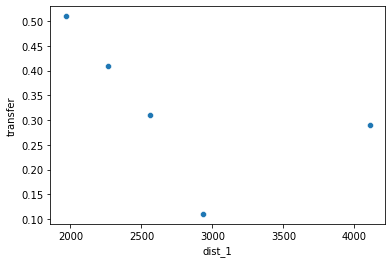

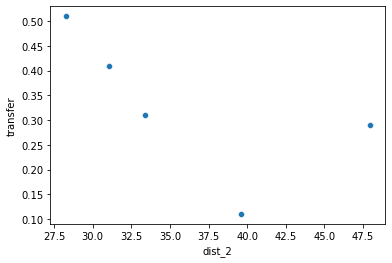

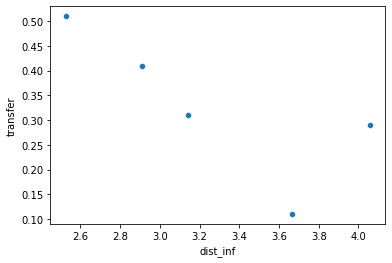

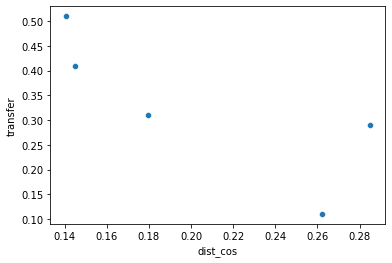

In [13]:
for d in dist_type:
    distance = 'dist_{}'.format(d)
    sns.scatterplot(data=res_df, y='transfer', x=distance)
    plt.show()

In [14]:
res_df.corr()

,transfer,dist_1,dist_2,dist_inf,dist_cos
transfer,1.000000,-0.545537,-0.639571,-0.767959,-0.791859
dist_1,-0.545537,1.000000,0.989955,0.954148,0.913111
dist_2,-0.639571,0.989955,1.000000,0.980042,0.958848
dist_inf,-0.767959,0.954148,0.980042,1.000000,0.969992
dist_cos,-0.791859,0.913111,0.958848,0.969992,1.000000
